# Projet 4: Anticipez le retard de vol des avions


## 1.Librairies

In [20]:
#!pip install feature_engine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA

# 2.Data

In [2]:
#df = pd.concat([pd.read_csv(f'C:/Users/adild/Desktop/Data Science-IA-Big Data/Parcours/CentraleSupelec_OCR/Projet_4/ML_DEV/2016_{x:0>2d}.csv', error_bad_lines=False)
                #for x in range(1, 13)])
#df.reset_index(drop=True, inplace=True)

In [3]:
#df.head()

In [4]:
#df.shape

In [5]:
#df.to_csv("00_data_Flights.csv")

In [6]:
#df.info(null_counts=True)

In [7]:
#df_00 = df.dropna(subset=['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])
#df_00.info(null_counts=True)

In [8]:
#df_00.to_csv("01_data_Flights.csv")

In [9]:
#df_00 = pd.read_csv("01_data_Flights.csv")
#df_00 = df_00.drop(['Unnamed: 0', 'Unnamed: 64'], axis=1)
#df_00.head()

In [10]:
#df_00.shape

### Sample for processing

In [11]:
#Selection of 20000 rows
#df_00=df_00.sample(n=20000)
#print(df_00.shape)
#df_00.head()

In [12]:
#df_00.to_csv('df_sample.csv')

In [25]:
df_00 = pd.read_csv("df_sample.csv")
df_00 = df_00.drop(['Unnamed: 0'], axis=1)
df_00.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2016,4,10,12,3,2016-10-12,AA,19805,AA,N982AA,...,370.0,2.0,0.0,0.0,31.0,0.0,0.0,NaN,NaN,NaN
1,2016,1,1,25,1,2016-01-25,UA,19977,UA,N57852,...,2227.0,9.0,39.0,0.0,41.0,0.0,0.0,NaN,NaN,NaN
2,2016,3,7,29,5,2016-07-29,WN,19393,WN,N8643A,...,973.0,4.0,20.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN
3,2016,4,12,2,5,2016-12-02,EV,20366,EV,N877AS,...,383.0,2.0,0.0,0.0,14.0,0.0,17.0,NaN,NaN,NaN
4,2016,2,6,7,2,2016-06-07,UA,19977,UA,N57868,...,2704.0,11.0,18.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [26]:
df_00.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   20000 non-null  int64  
 1   QUARTER                20000 non-null  int64  
 2   MONTH                  20000 non-null  int64  
 3   DAY_OF_MONTH           20000 non-null  int64  
 4   DAY_OF_WEEK            20000 non-null  int64  
 5   FL_DATE                20000 non-null  object 
 6   UNIQUE_CARRIER         20000 non-null  object 
 7   AIRLINE_ID             20000 non-null  int64  
 8   CARRIER                20000 non-null  object 
 9   TAIL_NUM               20000 non-null  object 
 10  FL_NUM                 20000 non-null  int64  
 11  ORIGIN_AIRPORT_ID      20000 non-null  float64
 12  ORIGIN_AIRPORT_SEQ_ID  20000 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  20000 non-null  int64  
 14  ORIGIN                 20000 non-null  object 
 15  OR

In [27]:
df_00.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [29]:
df_00.nunique()

YEAR                     1
QUARTER                  4
MONTH                   12
DAY_OF_MONTH            31
DAY_OF_WEEK              7
                      ... 
SECURITY_DELAY          34
LATE_AIRCRAFT_DELAY    328
FIRST_DEP_TIME         441
TOTAL_ADD_GTIME        110
LONGEST_ADD_GTIME      109
Length: 64, dtype: int64

## 3. Data Exploration

### Repetitive useless variables

In [30]:
#Deletion useless and repetitive variables

df_00=df_00.drop(['YEAR', 'FL_DATE', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'ORIGIN_STATE_FIPS',	'ORIGIN_WAC', 'DEST_STATE_FIPS','DEST_WAC', 'DEST', 'LONGEST_ADD_GTIME', 'TOTAL_ADD_GTIME', 'FIRST_DEP_TIME', 'CANCELLATION_CODE'], axis=1)
df_00.head()                                 

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,4,10,12,3,19805,AA,N982AA,640,14107.0,"Phoenix, AZ",...,128.0,57.0,1.0,370.0,2.0,0.0,0.0,31.0,0.0,0.0
1,1,1,25,1,19977,UA,N57852,1537,12889.0,"Las Vegas, NV",...,326.0,251.0,1.0,2227.0,9.0,39.0,0.0,41.0,0.0,0.0
2,3,7,29,5,19393,WN,N8643A,1514,11259.0,"Dallas, TX",...,157.0,142.0,1.0,973.0,4.0,20.0,0.0,2.0,0.0,0.0
3,4,12,2,5,20366,EV,N877AS,2767,11298.0,"Dallas/Fort Worth, TX",...,96.0,59.0,1.0,383.0,2.0,0.0,0.0,14.0,0.0,17.0
4,2,6,7,2,19977,UA,N57868,2013,14771.0,"San Francisco, CA",...,332.0,300.0,1.0,2704.0,11.0,18.0,0.0,0.0,0.0,0.0


In [31]:
df_00.shape

(20000, 43)

### Cancelled and Diverted flights

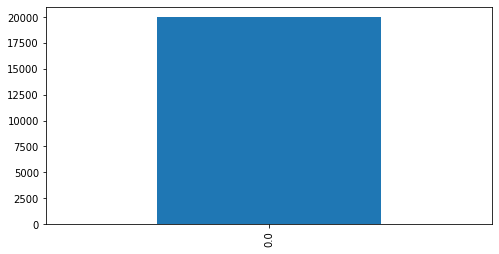

In [35]:
df_00['CANCELLED'].value_counts().plot.bar(figsize=(8,4))
plt.draw()

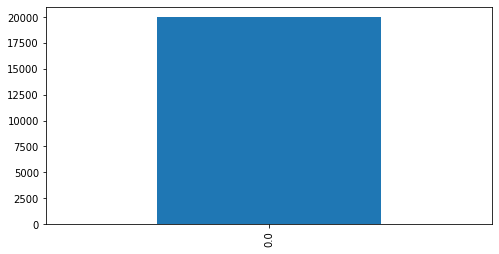

In [36]:
df_00['DIVERTED'].value_counts().plot.bar(figsize=(8,4))
plt.draw()

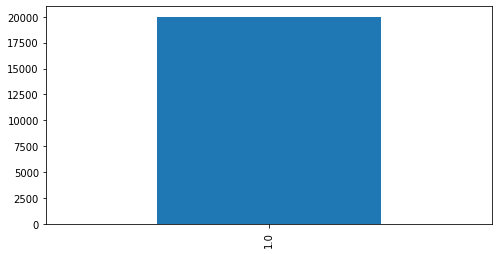

In [39]:
df_00["FLIGHTS"].value_counts().plot.bar(figsize=(8,4))
plt.draw()
# Constant variable to delete

### Descriptive Statistics

In [37]:
df_00.describe(include='all')

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000,20000,20000.000000,20000.00000,20000,...,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,NaN,NaN,NaN,NaN,NaN,12,4414,NaN,NaN,283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,N884AS,NaN,NaN,"Chicago, IL",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,4688,18,NaN,NaN,1376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.512100,6.614700,16.168100,3.940050,19923.33885,NaN,NaN,2085.733400,12690.83755,NaN,...,152.756000,122.486900,1.0,873.537650,3.966250,20.453800,2.753450,15.340100,0.062250,24.281750
std,1.091015,3.335176,8.720392,1.955415,396.69453,NaN,NaN,1716.371728,1499.11553,NaN,...,79.790053,76.239272,0.0,622.475353,2.463273,58.734627,21.630667,33.985838,1.748722,45.562508
min,1.000000,1.000000,1.000000,1.000000,19393.00000,NaN,NaN,1.000000,10135.00000,NaN,...,19.000000,9.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,9.000000,2.000000,19790.00000,NaN,NaN,711.000000,11292.00000,NaN,...,92.000000,64.000000,1.0,399.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,7.000000,16.000000,4.000000,19805.00000,NaN,NaN,1621.500000,12892.00000,NaN,...,136.000000,104.500000,1.0,719.000000,3.000000,1.000000,0.000000,2.000000,0.000000,2.500000
75%,3.000000,9.000000,24.000000,5.000000,20304.00000,NaN,NaN,2845.000000,13930.00000,NaN,...,190.000000,156.000000,1.0,1121.000000,5.000000,18.000000,0.000000,19.000000,0.000000,29.000000


In [38]:
df_00['CARRIER'].nunique()

12

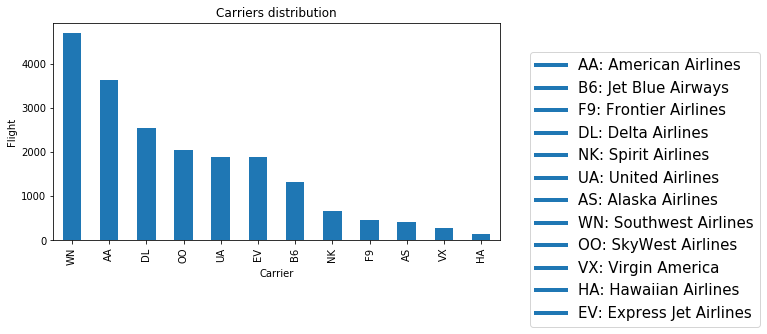

In [44]:
#Supp Cancelled et diverted = cte and other useless variables
df_00 = df_00.drop(["QUARTER", "AIRLINE_ID", "CANCELLED", "DIVERTED", "DEP_TIME_BLK", "ARR_TIME_BLK", "FL_NUM", 'TAIL_NUM'], axis=1)
df_00.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,10,12,3,AA,14107.0,"Phoenix, AZ",12892.0,"Los Angeles, CA",1958.0,1955.0,...,128.0,57.0,1.0,370.0,2.0,0.0,0.0,31.0,0.0,0.0
1,1,25,1,UA,12889.0,"Las Vegas, NV",11618.0,"Newark, NJ",1215.0,1254.0,...,326.0,251.0,1.0,2227.0,9.0,39.0,0.0,41.0,0.0,0.0
2,7,29,5,WN,11259.0,"Dallas, TX",13204.0,"Orlando, FL",1255.0,1315.0,...,157.0,142.0,1.0,973.0,4.0,20.0,0.0,2.0,0.0,0.0
3,12,2,5,EV,11298.0,"Dallas/Fort Worth, TX",10781.0,"Baton Rouge, LA",2020.0,2037.0,...,96.0,59.0,1.0,383.0,2.0,0.0,0.0,14.0,0.0,17.0
4,6,7,2,UA,14771.0,"San Francisco, CA",10721.0,"Boston, MA",2233.0,2253.0,...,332.0,300.0,1.0,2704.0,11.0,18.0,0.0,0.0,0.0,0.0


In [45]:
df_00.shape

(20000, 35)

In [46]:
Variables_reorganization = ['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','CARRIER','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','ORIGIN_CITY_NAME',
                            'DEST_CITY_NAME','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_TIME','DEP_DELAY_NEW','ARR_DELAY_NEW','DEP_DEL15',
                            'ARR_DEL15','DEP_DELAY_GROUP','ARR_DELAY_GROUP','TAXI_OUT','TAXI_IN','WHEELS_OFF','WHEELS_ON','CRS_ELAPSED_TIME',
                            'ACTUAL_ELAPSED_TIME','AIR_TIME','FLIGHTS','DISTANCE','DISTANCE_GROUP','CARRIER_DELAY','WEATHER_DELAY',
                            'NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'ARR_DELAY', 'DEP_DELAY']
                                                
len(Variables_reorganization)

35

In [47]:
df_00 = df_00[Variables_reorganization]
df_00.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,CRS_ARR_TIME,...,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY,DEP_DELAY
0,10,12,3,AA,14107.0,12892.0,"Phoenix, AZ","Los Angeles, CA",1958.0,2132.0,...,1.0,370.0,2.0,0.0,0.0,31.0,0.0,0.0,31.0,-3.0
1,1,25,1,UA,12889.0,11618.0,"Las Vegas, NV","Newark, NJ",1215.0,2000.0,...,1.0,2227.0,9.0,39.0,0.0,41.0,0.0,0.0,80.0,39.0
2,7,29,5,WN,11259.0,13204.0,"Dallas, TX","Orlando, FL",1255.0,1630.0,...,1.0,973.0,4.0,20.0,0.0,2.0,0.0,0.0,22.0,20.0
3,12,2,5,EV,11298.0,10781.0,"Dallas/Fort Worth, TX","Baton Rouge, LA",2020.0,2142.0,...,1.0,383.0,2.0,0.0,0.0,14.0,0.0,17.0,31.0,17.0
4,6,7,2,UA,14771.0,10721.0,"San Francisco, CA","Boston, MA",2233.0,707.0,...,1.0,2704.0,11.0,18.0,0.0,0.0,0.0,0.0,18.0,20.0


###  Converting variables for easier processing

In [48]:
for var in df_00.columns:
    if df_00[var].dtype == 'float64':
         df_00[var] = df_00[var].astype('int64', copy=False) 
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                20000 non-null  int64 
 1   DAY_OF_MONTH         20000 non-null  int64 
 2   DAY_OF_WEEK          20000 non-null  int64 
 3   CARRIER              20000 non-null  object
 4   ORIGIN_AIRPORT_ID    20000 non-null  int64 
 5   DEST_AIRPORT_ID      20000 non-null  int64 
 6   ORIGIN_CITY_NAME     20000 non-null  object
 7   DEST_CITY_NAME       20000 non-null  object
 8   CRS_DEP_TIME         20000 non-null  int64 
 9   CRS_ARR_TIME         20000 non-null  int64 
 10  DEP_TIME             20000 non-null  int64 
 11  ARR_TIME             20000 non-null  int64 
 12  DEP_DELAY_NEW        20000 non-null  int64 
 13  ARR_DELAY_NEW        20000 non-null  int64 
 14  DEP_DEL15            20000 non-null  int64 
 15  ARR_DEL15            20000 non-null  int64 
 16  DEP_

In [49]:
for var in df_00.iloc[:, 4:6]:
    if df_00[var].dtype == 'int64':
        df_00[var] = df_00[var].astype('object', copy=False) 
print(df_00.shape)
df_00.info()

(20000, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                20000 non-null  int64 
 1   DAY_OF_MONTH         20000 non-null  int64 
 2   DAY_OF_WEEK          20000 non-null  int64 
 3   CARRIER              20000 non-null  object
 4   ORIGIN_AIRPORT_ID    20000 non-null  object
 5   DEST_AIRPORT_ID      20000 non-null  object
 6   ORIGIN_CITY_NAME     20000 non-null  object
 7   DEST_CITY_NAME       20000 non-null  object
 8   CRS_DEP_TIME         20000 non-null  int64 
 9   CRS_ARR_TIME         20000 non-null  int64 
 10  DEP_TIME             20000 non-null  int64 
 11  ARR_TIME             20000 non-null  int64 
 12  DEP_DELAY_NEW        20000 non-null  int64 
 13  ARR_DELAY_NEW        20000 non-null  int64 
 14  DEP_DEL15            20000 non-null  int64 
 15  ARR_DEL15            20000 non-null  int6

### Attendance "Airports" and "Cities"

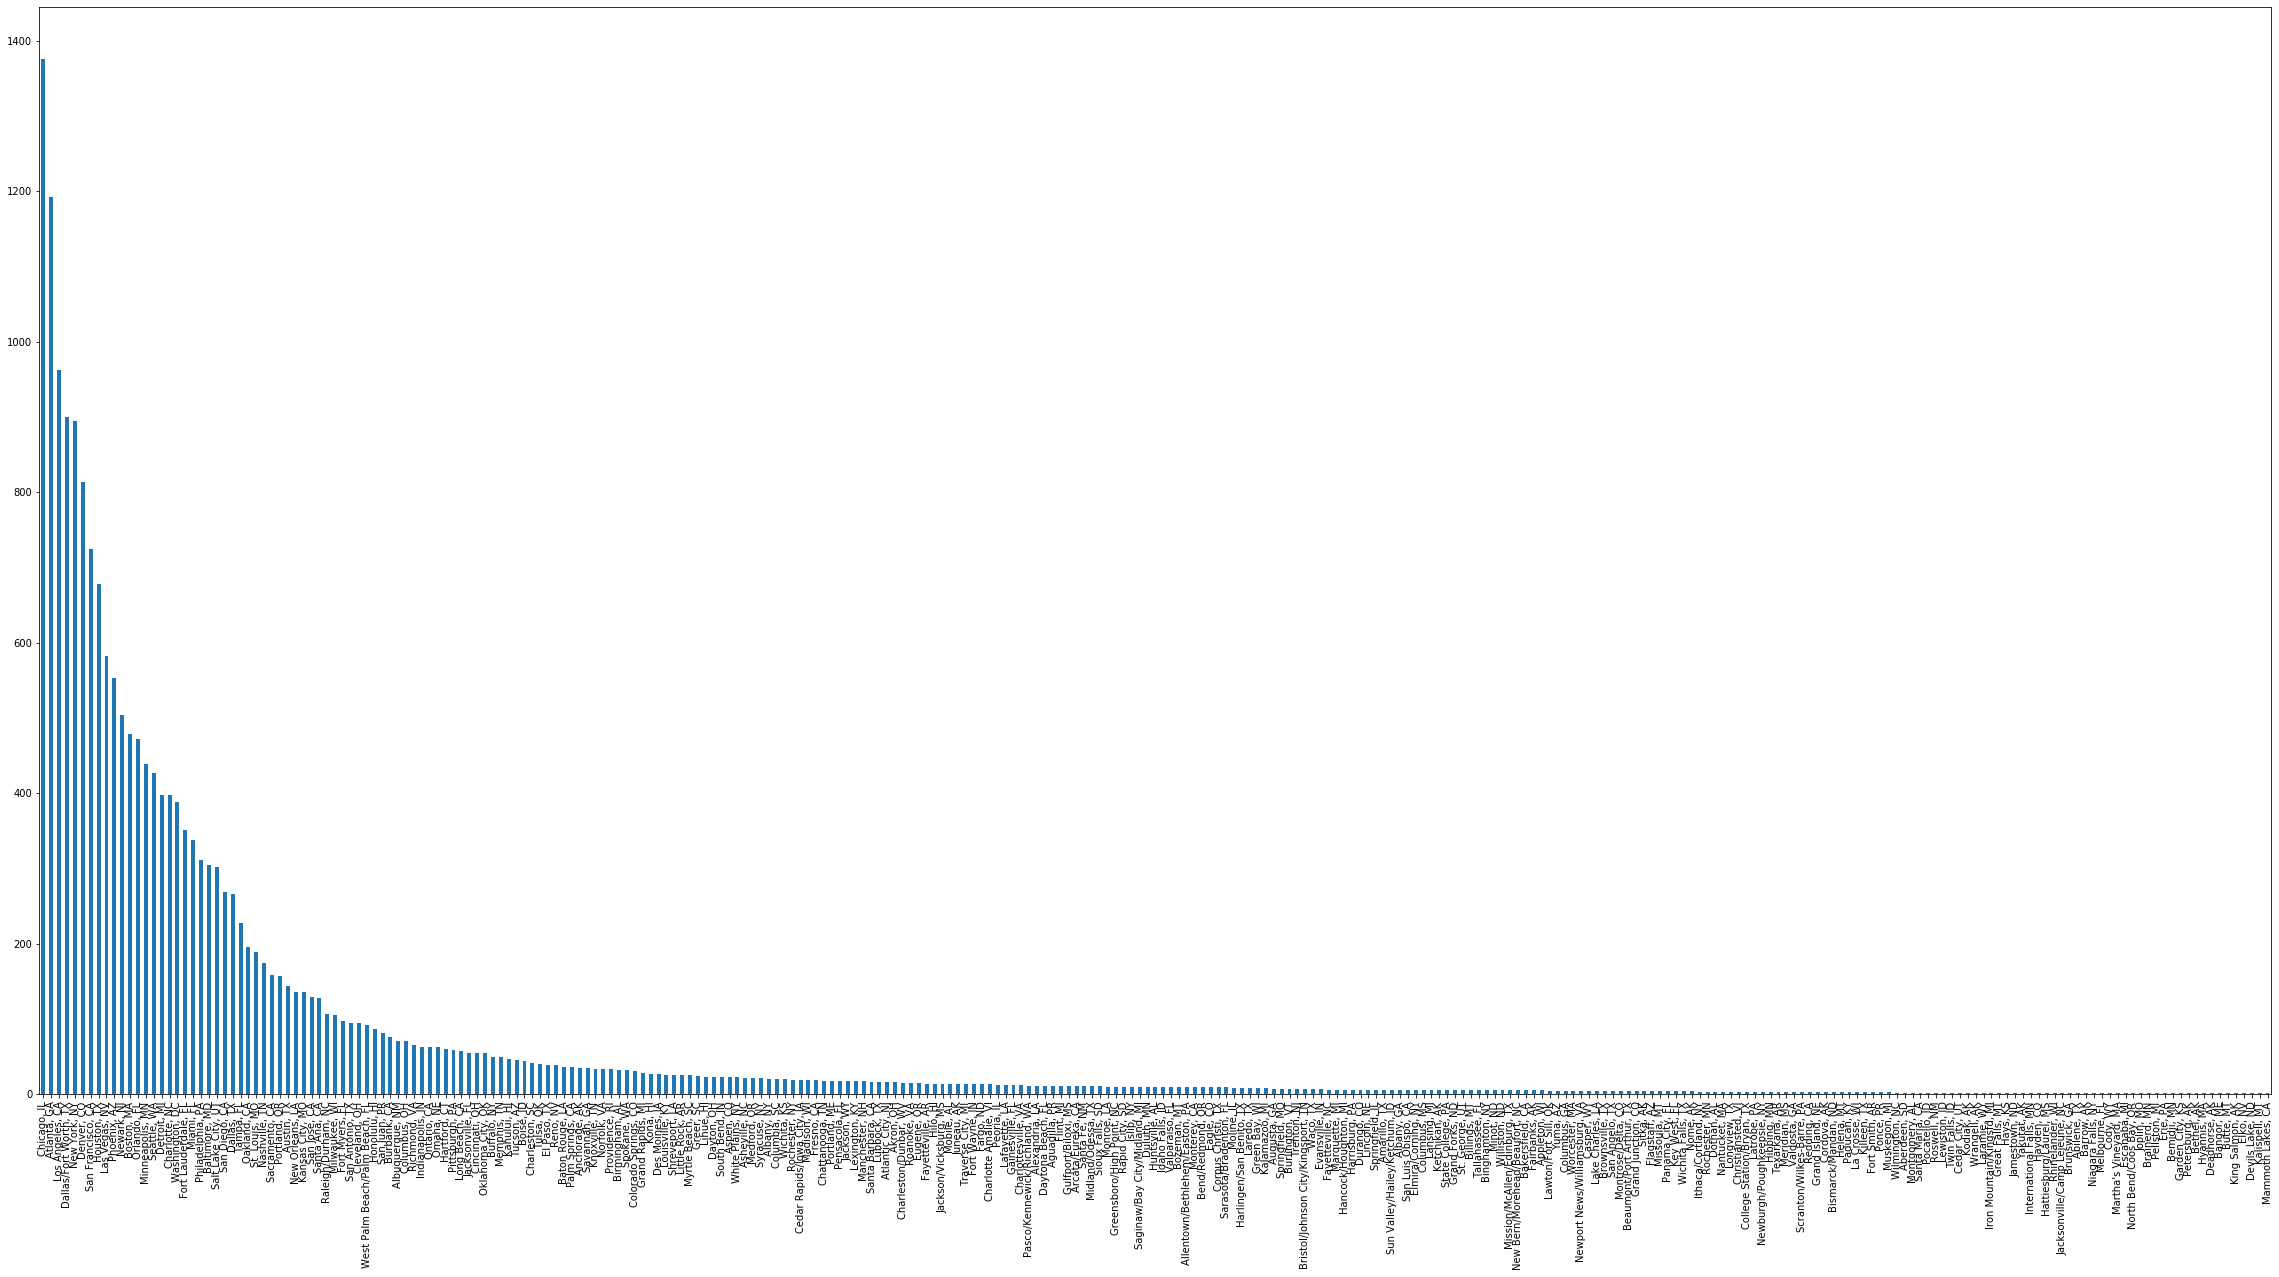

In [50]:
df_00['ORIGIN_CITY_NAME'].value_counts().plot.bar(figsize=(40,20))
plt.draw()

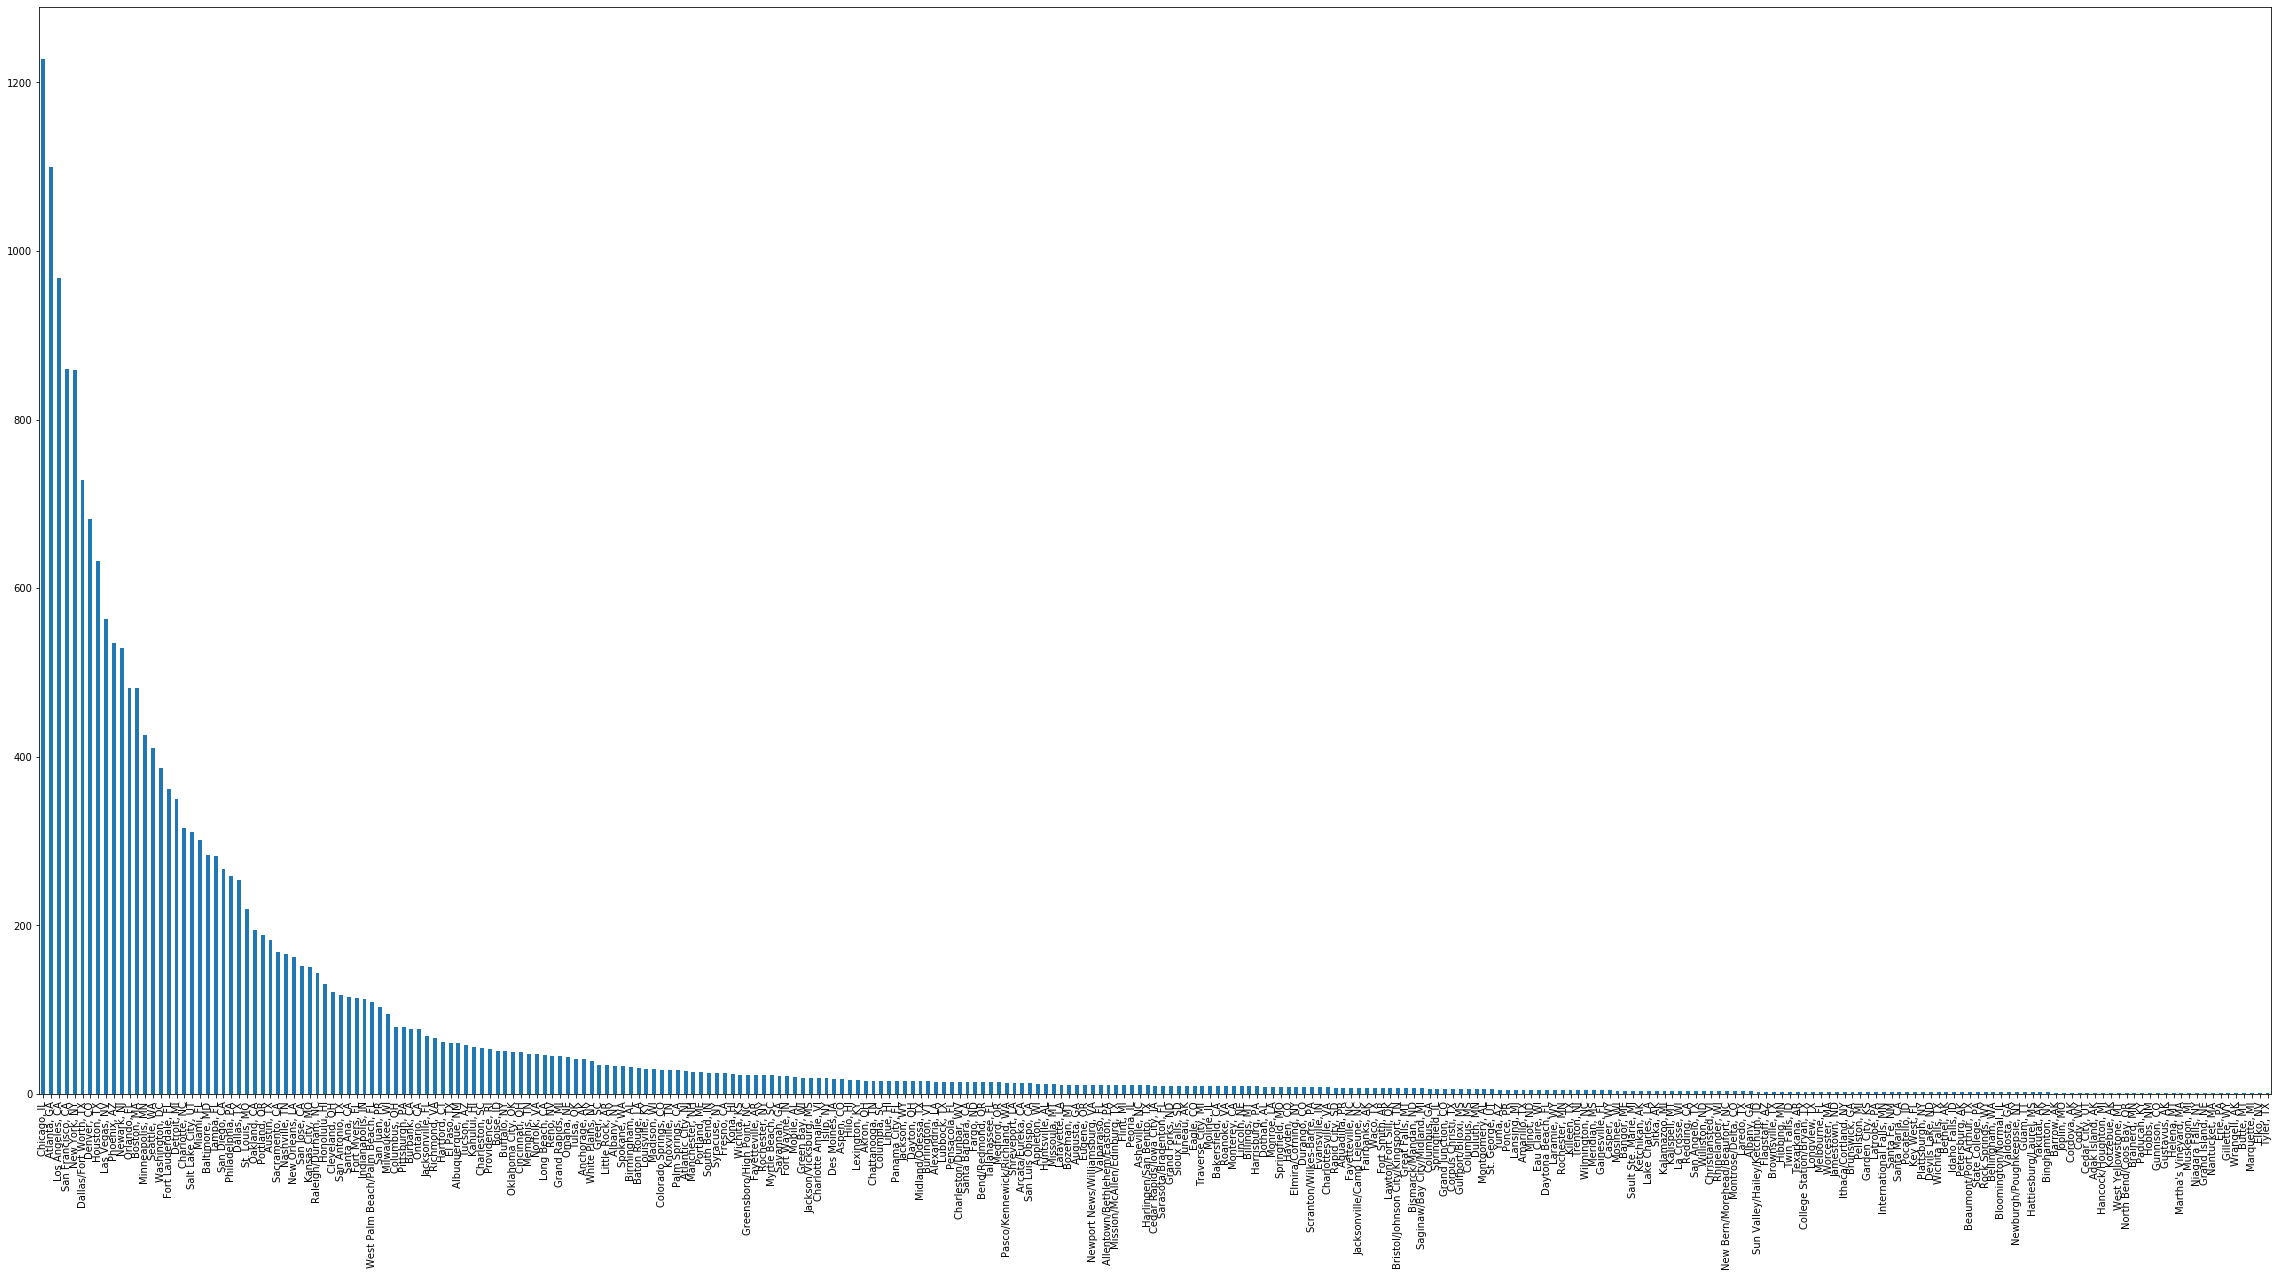

In [51]:
df_00['DEST_CITY_NAME'].value_counts().plot.bar(figsize=(40,20))
plt.draw()

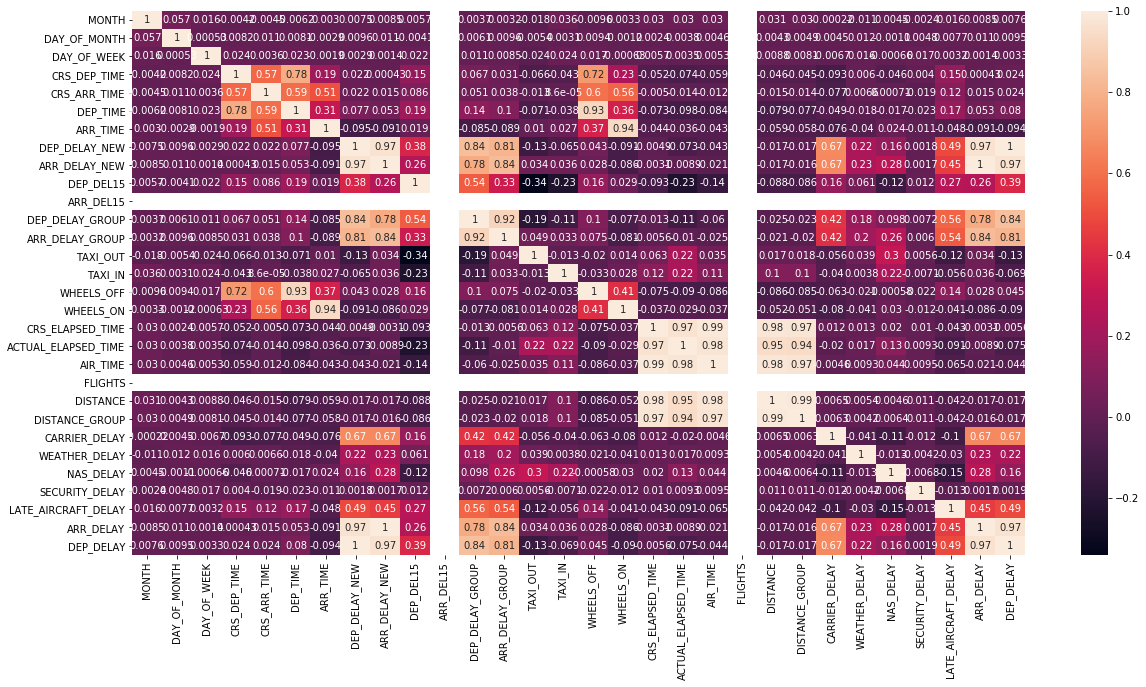

In [52]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_00.corr(), annot = True)
plt.draw()

In [53]:
#Supp Quarter "QUARTER", "FLIGHTS=cte", "DEP_DELY_NEW", "ARR_DELAY_NEW", "DISTANCE_GROUP= corr et causalité"
#Supp Ville aéroports meme info que les villes
#Supp 'CRS_ARR_TIME' je veux prédire les retards sur les départs, si je garde 'CRS_ARR_TIME' je dois intégrer le temps du parcours,
#l'opérateur veut prédir le retard pour organiser la logistique dans son aéroport il ne s'interesse pas à l'aéroport d'arrivé 

df_00= df_00.drop(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEP_TIME','ARR_TIME','DEP_DELAY_NEW','ARR_DELAY_NEW','DEP_DEL15','ARR_DEL15',
                   'DEP_DELAY_GROUP','ARR_DELAY_GROUP','TAXI_OUT','TAXI_IN','WHEELS_OFF','WHEELS_ON','ACTUAL_ELAPSED_TIME',
                   'AIR_TIME','FLIGHTS','DISTANCE_GROUP', 'ARR_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'CRS_ARR_TIME'], axis=1)
print(df_00.shape)
df_00.info()

(20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                20000 non-null  int64 
 1   DAY_OF_MONTH         20000 non-null  int64 
 2   DAY_OF_WEEK          20000 non-null  int64 
 3   CARRIER              20000 non-null  object
 4   ORIGIN_CITY_NAME     20000 non-null  object
 5   DEST_CITY_NAME       20000 non-null  object
 6   CRS_DEP_TIME         20000 non-null  int64 
 7   CARRIER_DELAY        20000 non-null  int64 
 8   WEATHER_DELAY        20000 non-null  int64 
 9   NAS_DELAY            20000 non-null  int64 
 10  SECURITY_DELAY       20000 non-null  int64 
 11  LATE_AIRCRAFT_DELAY  20000 non-null  int64 
 12  DEP_DELAY            20000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 2.0+ MB


### Outliers

In [54]:
# Outliers Diagnostic
# Function to create histogram and boxplot 
def diag_outliers(df, variable):
    
    # define figure size
    plt.figure(figsize=(10, 2))
    
    # histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, position histogram
    sns.distplot(df[variable], bins=30)
    plt.axvline(df[variable].mean(),color='r',label='Mean')
    plt.axvline(df[variable].median(),color='y',label='Median')
    plt.title('histogram')
    
    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('boxplot')
    
    plt.show()

In [55]:
def boundaries (df, variable, distance):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    return upper_boundary, lower_boundary

DEP_DELAY (158.0, -66.0)
CARRIER_DELAY (45.0, -27.0)
LATE_AIRCRAFT_DELAY (72.5, -43.5)
NAS_DELAY (47.5, -28.5)
SECURITY_DELAY (0.0, 0.0)
WEATHER_DELAY (0.0, 0.0)


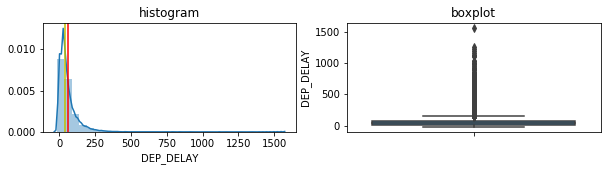

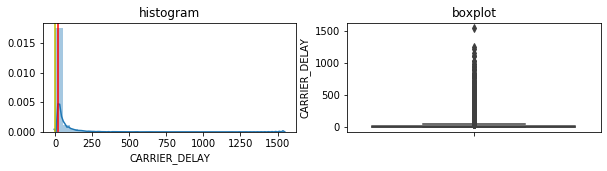

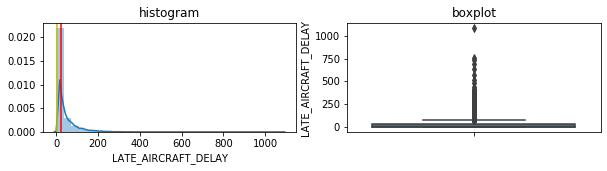

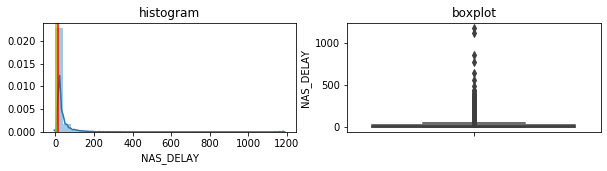

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

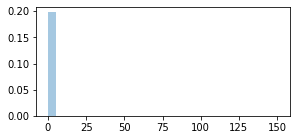

In [56]:
DEP_DELAY_upper_limit, DEP_DELAY_lower_limit = boundaries(df_00, 'DEP_DELAY', 1.5)
CARRIER_DELAY_upper_limit, CARRIER_DELAY_lower_limit = boundaries(df_00, 'CARRIER_DELAY', 1.5)
LATE_AIRCRAFT_DELAY_upper_limit, LATE_AIRCRAFT_DELAY_lower_limit = boundaries(df_00, 'LATE_AIRCRAFT_DELAY', 1.5)
NAS_DELAY_upper_limit, NAS_DELAY_lower_limit = boundaries(df_00, 'NAS_DELAY', 1.5)
SECURITY_DELAY_upper_limit, SECURITY_DELAY_lower_limit = boundaries(df_00, 'SECURITY_DELAY', 1.5)
WEATHER_DELAY_limit, WEATHER_DELAY_limit = boundaries(df_00, 'WEATHER_DELAY', 1.5)

print('DEP_DELAY',(DEP_DELAY_upper_limit, DEP_DELAY_lower_limit))
print('CARRIER_DELAY',(CARRIER_DELAY_upper_limit, CARRIER_DELAY_lower_limit))
print('LATE_AIRCRAFT_DELAY',(LATE_AIRCRAFT_DELAY_upper_limit, LATE_AIRCRAFT_DELAY_lower_limit))
print('NAS_DELAY',(NAS_DELAY_upper_limit, NAS_DELAY_lower_limit))
print('SECURITY_DELAY',(SECURITY_DELAY_upper_limit, SECURITY_DELAY_lower_limit))
print('WEATHER_DELAY',(WEATHER_DELAY_limit, WEATHER_DELAY_limit))

diag_outliers(df_00, 'DEP_DELAY')
diag_outliers(df_00, 'CARRIER_DELAY')
diag_outliers(df_00, 'LATE_AIRCRAFT_DELAY')
diag_outliers(df_00, 'NAS_DELAY')
diag_outliers(df_00, 'SECURITY_DELAY')
diag_outliers(df_00, 'WEATHER_DELAY')

In [57]:
# DEP_DELAY
df_00['DEP_DELAY'] = np.where(df_00['DEP_DELAY'] > 180.0, np.NaN, df_00['DEP_DELAY'])

# CARRIER_DELAY
df_00['CARRIER_DELAY'] = np.where(df_00['CARRIER_DELAY'] > 45.0, np.NaN, df_00['CARRIER_DELAY'])

# LATE_AIRCRAFT_DELAY
df_00['LATE_AIRCRAFT_DELAY'] = np.where(df_00['LATE_AIRCRAFT_DELAY'] > 80.0, np.NaN, df_00['LATE_AIRCRAFT_DELAY'])

# NAS_DELAY
df_00['NAS_DELAY'] = np.where(df_00['NAS_DELAY'] > 45.0, np.NaN, df_00['NAS_DELAY'])

# SECURITY_DELAY 
df_00['SECURITY_DELAY'] = np.where(df_00['SECURITY_DELAY'] > 5.0, np.NaN, df_00['SECURITY_DELAY'])
                               
# WEATHER_DELAY 
df_00['WEATHER_DELAY'] = np.where(df_00['WEATHER_DELAY'] > 5.0, np.NaN, df_00['WEATHER_DELAY'])
                                                             

In [58]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                20000 non-null  int64  
 1   DAY_OF_MONTH         20000 non-null  int64  
 2   DAY_OF_WEEK          20000 non-null  int64  
 3   CARRIER              20000 non-null  object 
 4   ORIGIN_CITY_NAME     20000 non-null  object 
 5   DEST_CITY_NAME       20000 non-null  object 
 6   CRS_DEP_TIME         20000 non-null  int64  
 7   CARRIER_DELAY        17713 non-null  float64
 8   WEATHER_DELAY        19087 non-null  float64
 9   NAS_DELAY            18315 non-null  float64
 10  SECURITY_DELAY       19953 non-null  float64
 11  LATE_AIRCRAFT_DELAY  18273 non-null  float64
 12  DEP_DELAY            18916 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 2.0+ MB


In [59]:
df_00 = df_00.dropna()
df_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13645 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                13645 non-null  int64  
 1   DAY_OF_MONTH         13645 non-null  int64  
 2   DAY_OF_WEEK          13645 non-null  int64  
 3   CARRIER              13645 non-null  object 
 4   ORIGIN_CITY_NAME     13645 non-null  object 
 5   DEST_CITY_NAME       13645 non-null  object 
 6   CRS_DEP_TIME         13645 non-null  int64  
 7   CARRIER_DELAY        13645 non-null  float64
 8   WEATHER_DELAY        13645 non-null  float64
 9   NAS_DELAY            13645 non-null  float64
 10  SECURITY_DELAY       13645 non-null  float64
 11  LATE_AIRCRAFT_DELAY  13645 non-null  float64
 12  DEP_DELAY            13645 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 1.5+ MB


### Monthly Flights

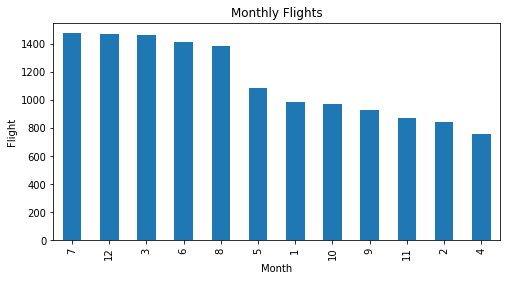

In [64]:
df_00['MONTH'].value_counts().plot.bar(figsize=(8,4))
plt.title('Monthly Flights')
plt.xlabel('Month')
plt.ylabel('Flight')
plt.draw()

### Daily Flights (Day of the month)

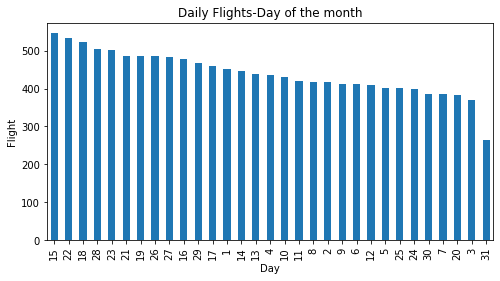

In [65]:
df_00['DAY_OF_MONTH'].value_counts().plot.bar(figsize=(8,4))
plt.title('Daily Flights-Day of the month')
plt.xlabel('Day')
plt.ylabel('Flight')
plt.draw()

### Daily Flights (Day of the week)

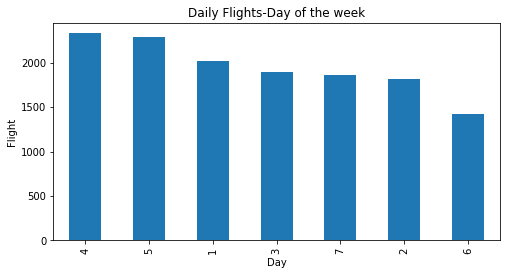

In [66]:
df_00['DAY_OF_WEEK'].value_counts().plot.bar(figsize=(8,4))
plt.title('Daily Flights-Day of the week')
plt.xlabel('Day')
plt.ylabel('Flight')
plt.draw()

### Flights by Airlines

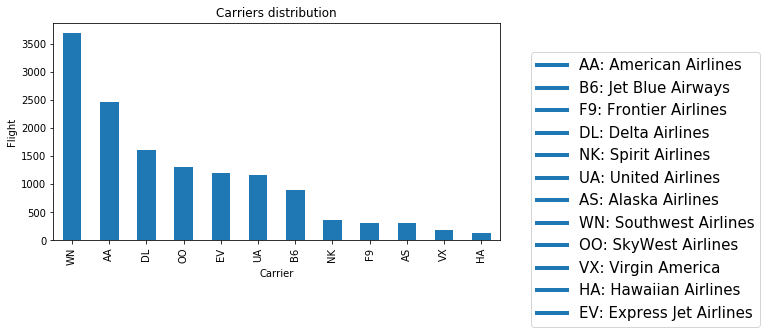

In [67]:
carriers =  {
    'AA': 'American Airlines', 
    'B6': 'Jet Blue Airways',
    'F9': 'Frontier Airlines',
    'DL': 'Delta Airlines',                            
    'NK': 'Spirit Airlines', 
    'UA': 'United Airlines',                        
    'AS': 'Alaska Airlines', 
    'WN': 'Southwest Airlines',
    'OO': 'SkyWest Airlines',
    'VX': 'Virgin America',
    'HA': 'Hawaiian Airlines',
    'EV': 'Express Jet Airlines',
}
fig, ax = plt.subplots(figsize=(8, 6))
df_00['CARRIER'].value_counts().plot.bar(figsize=(8,4))
legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label=f'{k}: {v}') for k, v in carriers.items()]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.6, 0.9), prop={'size': 15})
plt.title('Carriers distribution')
plt.xlabel('Carrier')
plt.ylabel('Flight')
plt.draw()
plt.show()

### Delay cumulative Airlines (Monthly and Day of  the week)

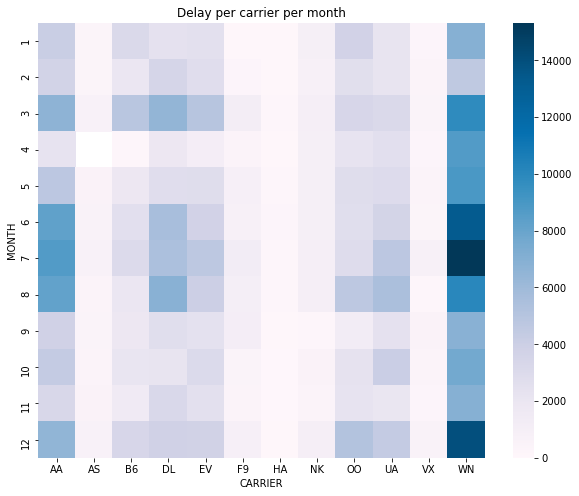

In [60]:
carrier_delay = df_00.groupby(df_00['CARRIER'])['DEP_DELAY'].sum()  # CARRIER_TOTAL_DELAY
carrier_best = carrier_delay.sort_values(ascending=False)[:12].index  #Decreasing order of carrier
carrier_pivot = pd.pivot_table(data = df_00[df_00['CARRIER'].isin(carrier_best)],
                                       index=['MONTH'],
                                       columns=['CARRIER'],  #Create a spreadsheet-style
                                       values=['DEP_DELAY'],
                                       aggfunc='sum')
fig_5, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(carrier_pivot['DEP_DELAY'],vmin=0,cmap='PuBu') #Delay per carrier per month 
plt.title('Delay per carrier per month')
plt.draw()

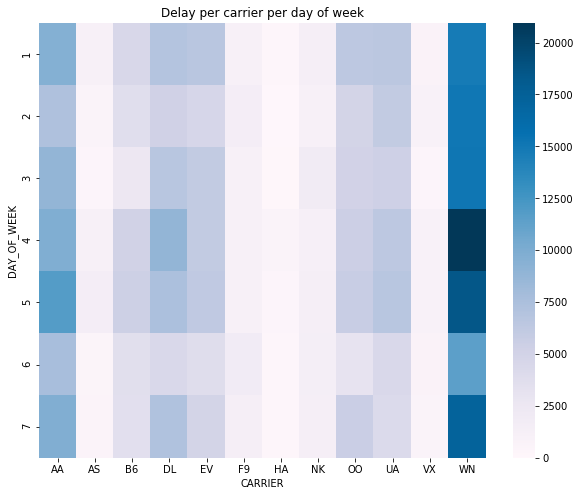

In [62]:
carrier_delay_01 = df_00.groupby(df_00['CARRIER'])['DEP_DELAY'].sum()  # CARRIER_TOTAL_DELAY
carrier_best_01 = carrier_delay.sort_values(ascending=False)[:12].index  #Decreasing order of carrier
carrier_pivot = pd.pivot_table(data = df_00[df_00['CARRIER'].isin(carrier_best)],
                                       index=['DAY_OF_WEEK'],
                                       columns=['CARRIER'],  #Create a spreadsheet-style
                                       values=['DEP_DELAY'],
                                       aggfunc='sum')
fig_5, ax = plt.subplots(figsize=(10,8)) # 
sns.heatmap(carrier_pivot['DEP_DELAY'],vmin=0,cmap='PuBu')
plt.title('Delay per carrier per day of week')
plt.draw()

### Analysis

In [50]:
#Variables Analysis

def Analysis(df, var_1, var_2):
    
    #define figure size
    plt.figure(figsize=(50, 5))

    df.groupby(var_1)[var_2].mean().plot(kind='bar')
    
    plt.show()

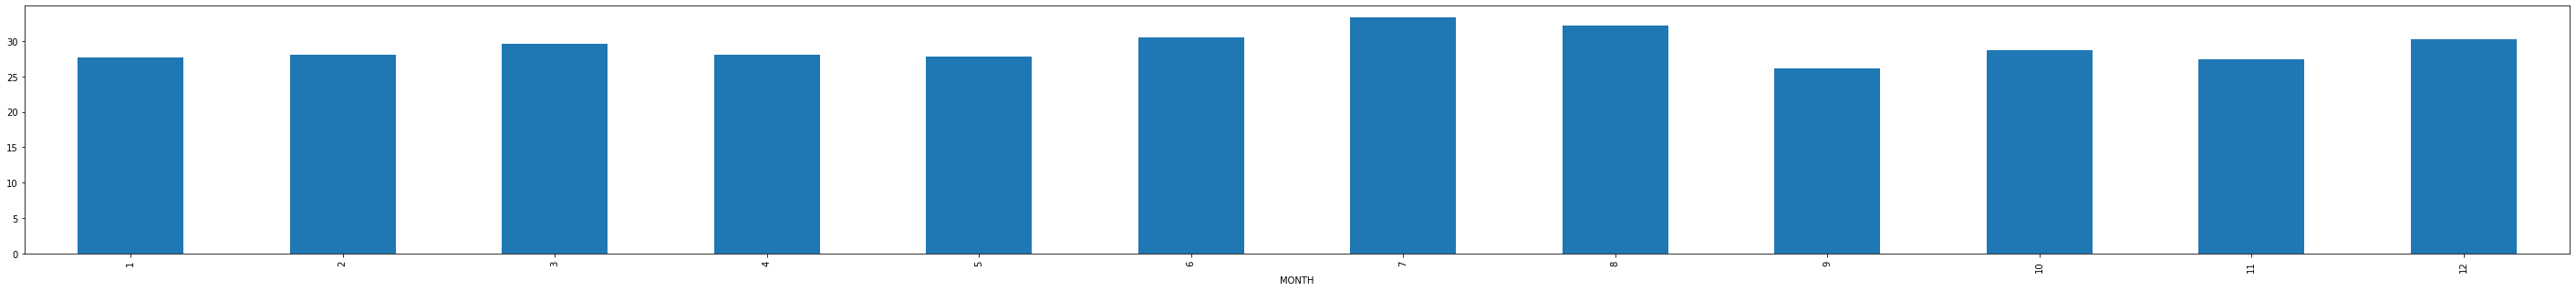

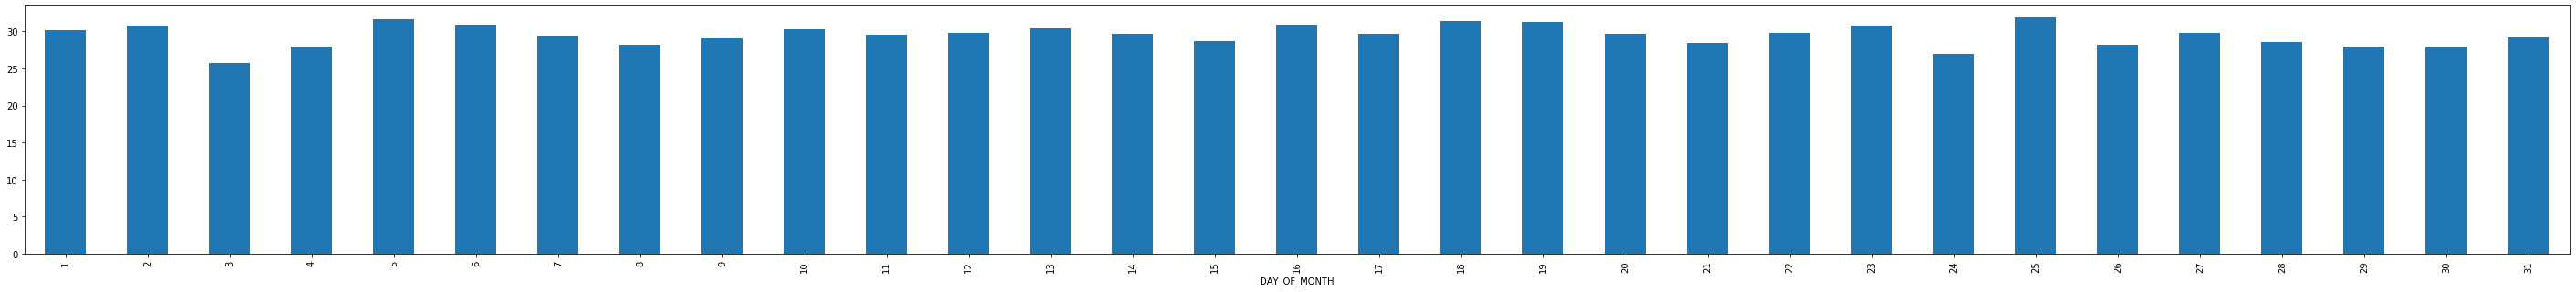

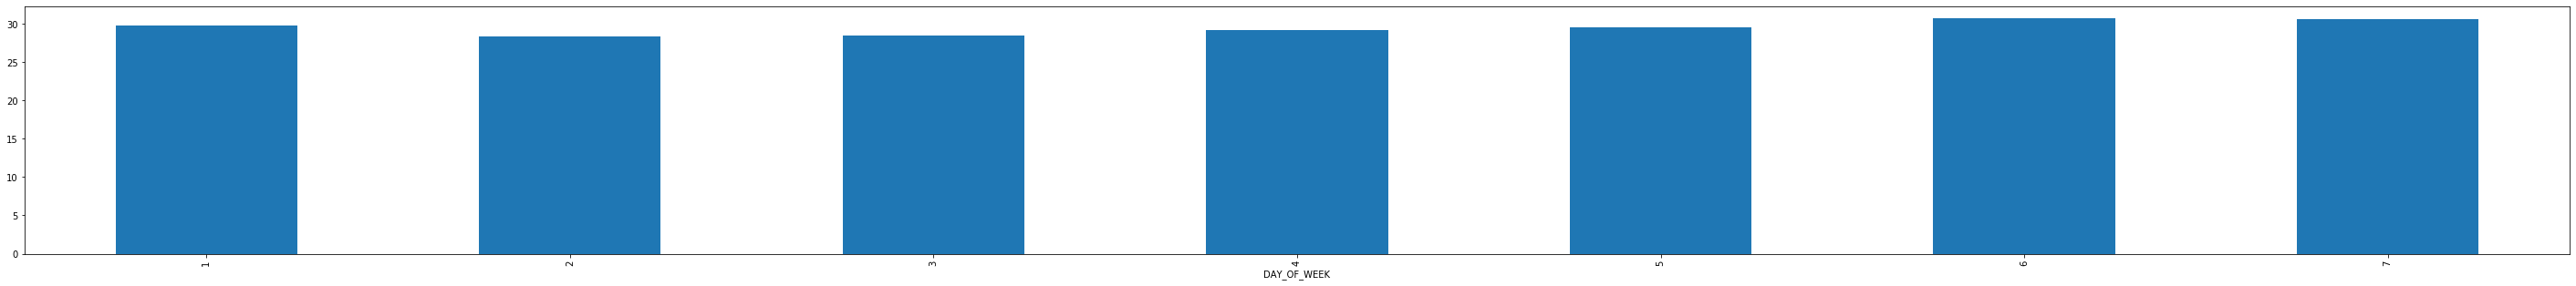

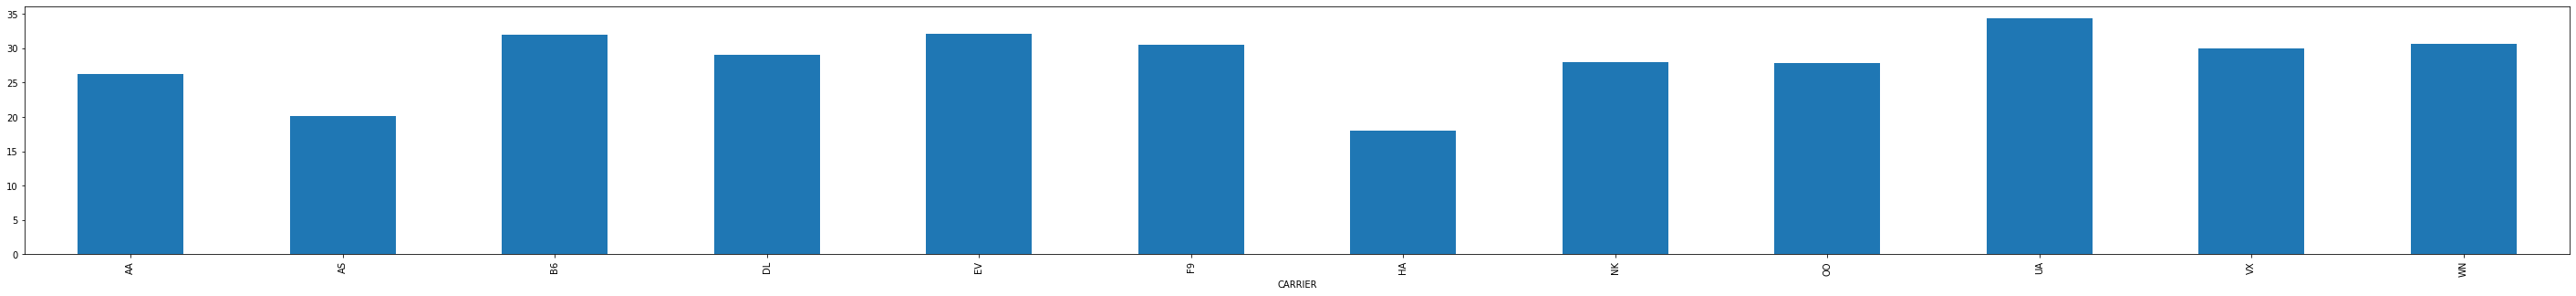

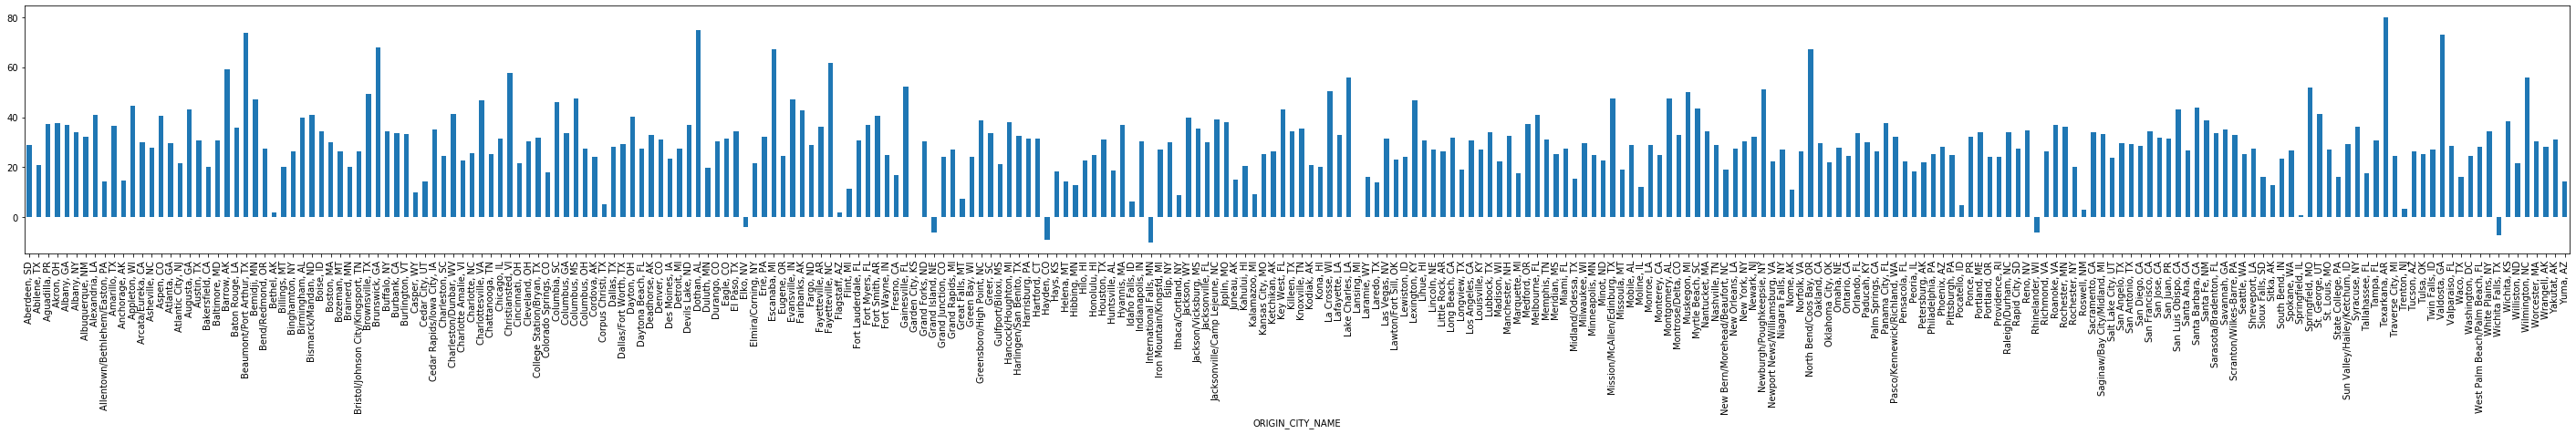

In [51]:
Analysis(df_00, 'MONTH', 'DEP_DELAY')
Analysis(df_00, 'DAY_OF_MONTH', 'DEP_DELAY')
Analysis(df_00, 'DAY_OF_WEEK', 'DEP_DELAY')
Analysis(df_00, 'CARRIER', 'DEP_DELAY')
Analysis(df_00, 'ORIGIN_CITY_NAME', 'DEP_DELAY')

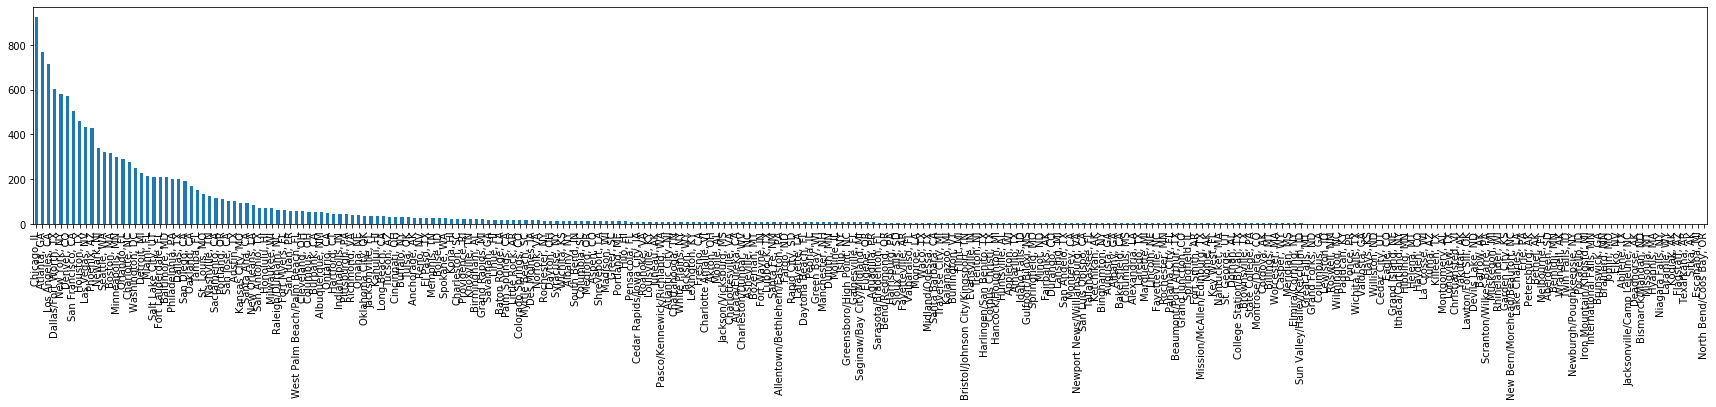

In [52]:
df_00["ORIGIN_CITY_NAME"].value_counts().plot.bar(figsize=(30,4))
plt.draw()

In [53]:
for var in df_00.columns:
    if df_00[var].dtype == 'float64':
        df_00[var] = df_00[var].astype('int64', copy=False) 
df_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13645 entries, 774449 to 579554
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                13645 non-null  int64 
 1   DAY_OF_MONTH         13645 non-null  int64 
 2   DAY_OF_WEEK          13645 non-null  int64 
 3   CARRIER              13645 non-null  object
 4   ORIGIN_CITY_NAME     13645 non-null  object
 5   DEST_CITY_NAME       13645 non-null  object
 6   CRS_DEP_TIME         13645 non-null  int64 
 7   CARRIER_DELAY        13645 non-null  int64 
 8   WEATHER_DELAY        13645 non-null  int64 
 9   NAS_DELAY            13645 non-null  int64 
 10  SECURITY_DELAY       13645 non-null  int64 
 11  LATE_AIRCRAFT_DELAY  13645 non-null  int64 
 12  DEP_DELAY            13645 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.5+ MB


C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
#for col in ['CRS_DEP_TIME', 'CRS_ARR_TIME']:
df_00['CRS_DEP_TIME'] = df_00['CRS_DEP_TIME'].values.astype(int).astype('str')
df_00['CRS_DEP_TIME'] = df_00['CRS_DEP_TIME'].str.zfill(4).str[:2].astype(int)

C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
df_00.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY
774449,10,12,3,AA,"Phoenix, AZ","Los Angeles, CA",19,0,0,31,0,0,-3
33994,1,25,1,UA,"Las Vegas, NV","Newark, NJ",12,39,0,41,0,0,39
489699,7,29,5,WN,"Dallas, TX","Orlando, FL",12,20,0,2,0,0,20
877712,12,2,5,EV,"Dallas/Fort Worth, TX","Baton Rouge, LA",20,0,0,14,0,17,17
431172,6,7,2,UA,"San Francisco, CA","Boston, MA",22,18,0,0,0,0,20


###  Treatment of categorical variables


In [56]:
for var in df_00.iloc[:, 0:7]:
    if df_00[var].dtype == 'int64':
        df_00[var] = df_00[var].astype('object', copy=False) 
    elif df_00[var].dtype == 'int32':
        df_00[var] = df_00[var].astype('object', copy=False)
print(df_00.shape)
df_00.info()

(13645, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13645 entries, 774449 to 579554
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                13645 non-null  object
 1   DAY_OF_MONTH         13645 non-null  object
 2   DAY_OF_WEEK          13645 non-null  object
 3   CARRIER              13645 non-null  object
 4   ORIGIN_CITY_NAME     13645 non-null  object
 5   DEST_CITY_NAME       13645 non-null  object
 6   CRS_DEP_TIME         13645 non-null  object
 7   CARRIER_DELAY        13645 non-null  int64 
 8   WEATHER_DELAY        13645 non-null  int64 
 9   NAS_DELAY            13645 non-null  int64 
 10  SECURITY_DELAY       13645 non-null  int64 
 11  LATE_AIRCRAFT_DELAY  13645 non-null  int64 
 12  DEP_DELAY            13645 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.5+ MB


C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adild\Anaconda3\envs\deeplearningaz\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
df_00.shape

(13645, 13)

In [58]:
df_Origin=pd.DataFrame(pd.unique(df_00['ORIGIN_CITY_NAME']), columns = ['Input'])
df_Origin.to_csv("02_df_Origin.csv")

In [59]:
df_Dest=pd.DataFrame(pd.unique(df_00['DEST_CITY_NAME']), columns = ['Input'])
df_Dest.to_csv("03_df_Dest.csv")

In [60]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['CARRIER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'CRS_DEP_TIME'],
    drop_last=False)
ohe_enc.fit(df_00)

OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                         variables=['CARRIER', 'ORIGIN_CITY_NAME',
                                    'DEST_CITY_NAME', 'MONTH', 'DAY_OF_WEEK',
                                    'DAY_OF_MONTH', 'CRS_DEP_TIME'])

### Final Data

In [61]:
df_01 = ohe_enc.transform(df_00)
df_01.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DELAY,CARRIER_AA,CARRIER_UA,CARRIER_WN,CARRIER_EV,...,CRS_DEP_TIME_7,CRS_DEP_TIME_9,CRS_DEP_TIME_13,CRS_DEP_TIME_6,CRS_DEP_TIME_1,CRS_DEP_TIME_8,CRS_DEP_TIME_23,CRS_DEP_TIME_0,CRS_DEP_TIME_3,CRS_DEP_TIME_2
774449,0,0,31,0,0,-3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33994,39,0,41,0,0,39,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489699,20,0,2,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
877712,0,0,14,0,17,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
431172,18,0,0,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_01.to_csv("04_data_model_final.csv")